# Быстрый старт в анализ данных (Python 3!!!!!!)

# Определение кредитоспособности клиента

В данном датасете представлена информация по клиентам (все для всех параметров названия заменены для защиты конфиденциальности).
Каждый клиент имеет метку - 0 или 1, обозначающую его кредитоспособность. 1 - клиент сможет выплатить кредит, 0 - наоборот




In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
#data = pd.read_csv(url, header = None, sep = ', ', engine='python')
data = pd.read_csv('australian.dat', sep = ', ', engine = 'python')

In [4]:
data.index

RangeIndex(start=0, stop=690, step=1)

# Description of the dataset

THIS CREDIT DATA ORIGINATES FROM QUINLAN (see below).   

1. Title: Australian Credit Approval

2. Sources: 
    (confidential)
    Submitted by quinlan@cs.su.oz.au

3.  Past Usage:

    See Quinlan,
    * "Simplifying decision trees", Int J Man-Machine Studies 27,
      Dec 1987, pp. 221-234.
    * "C4.5: Programs for Machine Learning", Morgan Kaufmann, Oct 1992
  
4.  Relevant Information:

    This file concerns credit card applications.  **All attribute names
    and values have been changed to meaningless symbols to protect
    confidentiality of the data.**
  
    This dataset is interesting because there is a good mix of
    attributes -- continuous, nominal with small numbers of
    values, and nominal with larger numbers of values.  There
    are also a few missing values.
  
5.  Number of Instances: 690

6.  Number of Attributes: 14 + class attribute

7.  Attribute Information:   THERE ARE 6 NUMERICAL AND 8 CATEGORICAL ATTRIBUTES.
 
                             THE LABELS HAVE BEEN CHANGED FOR THE CONVENIENCE
                             OF THE STATISTICAL ALGORITHMS.   FOR EXAMPLE,
                             ATTRIBUTE 4 ORIGINALLY HAD 3 LABELS p,g,gg AND
                             THESE HAVE BEEN CHANGED TO LABELS 1,2,3.
                             

    A1:	0,1    CATEGORICAL
        a,b
    A2:	continuous.
    A3:	continuous.
    A4:	1,2,3         CATEGORICAL
        p,g,gg
    A5:  1, 2,3,4,5, 6,7,8,9,10,11,12,13,14    CATEGORICAL
         ff,d,i,k,j,aa,m,c,w, e, q, r,cc, x 
         
    A6:	 1, 2,3, 4,5,6,7,8,9    CATEGORICAL
        ff,dd,j,bb,v,n,o,h,z 

    A7:	continuous.
    A8:	1, 0       CATEGORICAL
        t, f.
    A9: 1, 0	    CATEGORICAL
        t, f.
    A10:	continuous.
    A11:  1, 0	    CATEGORICAL
          t, f.
    A12:    1, 2, 3    CATEGORICAL
            s, g, p 
    A13:	continuous.
    A14:	continuous.
    A15:   0,1
           -,+        (class attribute)
           Class 1 indicates clients with approved credits
            
8.  Missing Attribute Values:
    37 cases (5%) HAD one or more missing values.  The missing
    values from particular attributes WERE:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13
    
    THESE WERE REPLACED BY THE MODE OF THE ATTRIBUTE (CATEGORICAL)
                               MEAN OF THE ATTRIBUTE (CONTINUOUS)
                           
9.  Class Distribution
  
    +: 307 (44.5%)    CLASS 1
    -: 383 (55.5%)    CLASS 0


10.  There is no cost matrix.




In [5]:
print(data.shape)
print(data.columns)

(690, 15)
Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'class'],
      dtype='object')


In [6]:
data.index

RangeIndex(start=0, stop=690, step=1)

In [7]:
data.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


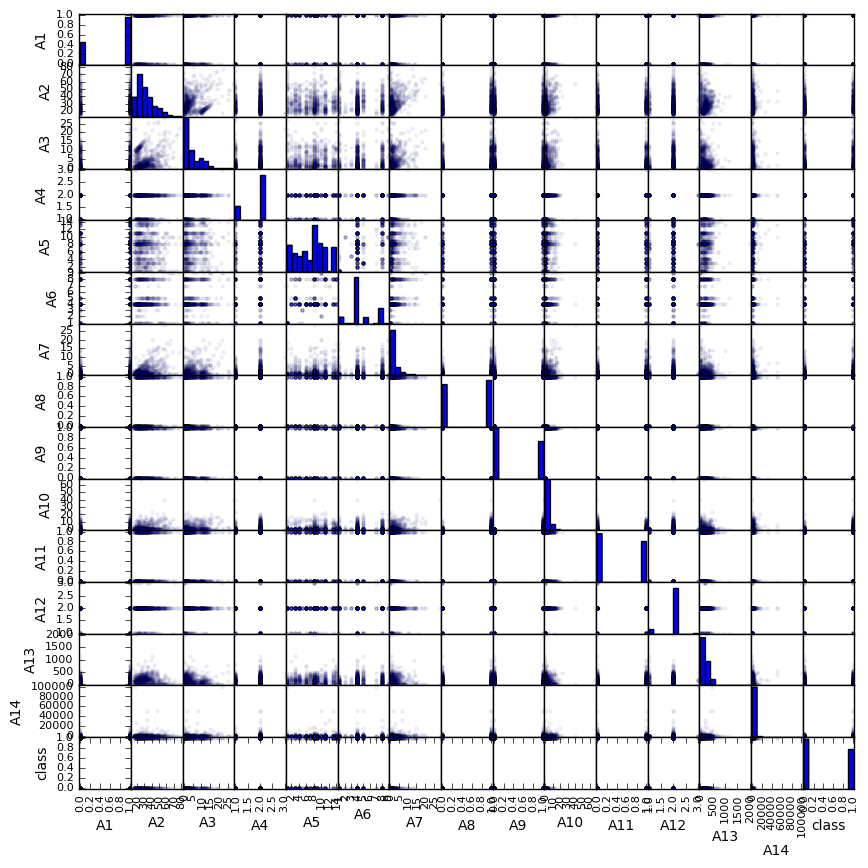

In [8]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha = .05, figsize = (10, 10))
pass

In [9]:
data.corr()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
A1,1.000000,0.036659,-0.028166,-0.063528,-0.005321,0.052658,0.097009,0.000918,-0.063256,-0.008427,0.053984,-0.059901,0.058595,0.003616,-0.013897
A2,0.036659,1.000000,0.201315,0.089503,-0.093877,0.028510,0.392788,0.204342,0.083680,0.185574,0.054779,0.020703,-0.077159,0.018539,0.161626
A3,-0.028166,0.201315,1.000000,0.091526,0.027665,0.094504,0.298902,0.244317,0.174846,0.271207,-0.013023,0.093752,-0.222346,0.123121,0.206294
A4,-0.063528,0.089503,0.091526,1.000000,0.088846,0.046639,0.080624,0.129863,0.162464,0.106457,0.004964,0.006400,-0.001758,0.120065,0.194306
A5,-0.005321,-0.093877,0.027665,0.088846,1.000000,0.402284,0.144757,0.311833,0.222957,0.150166,0.024738,0.070222,0.088140,0.030735,0.373712
A6,0.052658,0.028510,0.094504,0.046639,0.402284,1.000000,0.240400,0.246193,0.080397,0.098841,0.093641,0.036435,0.070662,0.064841,0.246567
A7,0.097009,0.392788,0.298902,0.080624,0.144757,0.240400,1.000000,0.345689,0.222982,0.322330,0.138139,-0.016297,-0.076389,0.051345,0.322475
A8,0.000918,0.204342,0.244317,0.129863,0.311833,0.246193,0.345689,1.000000,0.432032,0.379532,0.091276,0.045054,-0.067387,0.090012,0.720407
A9,-0.063256,0.083680,0.174846,0.162464,0.222957,0.080397,0.222982,0.432032,1.000000,0.571498,0.017043,0.176097,-0.053321,0.077652,0.458301
A10,-0.008427,0.185574,0.271207,0.106457,0.150166,0.098841,0.322330,0.379532,0.571498,1.000000,0.006944,0.101479,-0.119808,0.063692,0.406410


Как видно из матрицы, наибольшее значение на определение кредитоспособности клиента, скорее всего, имеют параметры A5, A8, A9, A10 (корреляции больше 0.35). Более того, по одному бинарному параметру А8 можно с вероятностью 0.720407 верно предсказать к

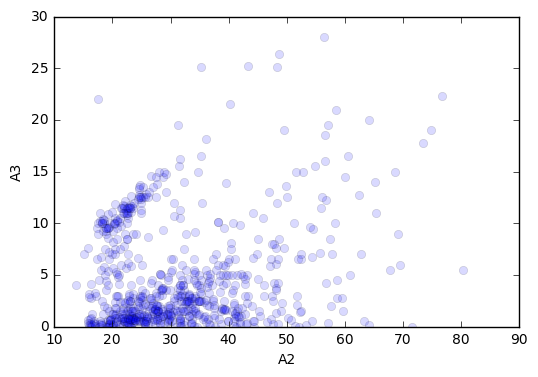

In [10]:
plt.plot(data['A2'], data['A3'], 'o', alpha = 0.15)
plt.xlabel('A2')
plt.ylabel('A3')
pass

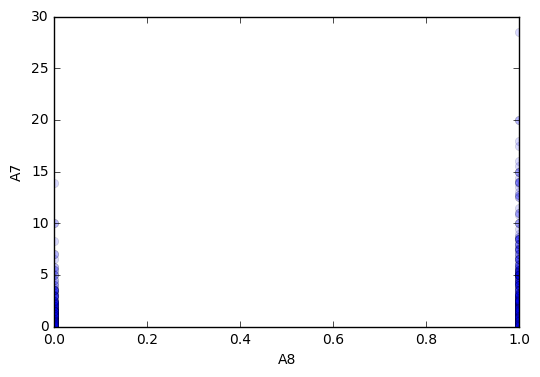

In [11]:
plt.plot(data['A8'], data['A7'], 'o', alpha = 0.15)
plt.xlabel('A8')
plt.ylabel('A7')
pass

In [12]:
sum(data['class'] == 0)

383

2 параметра с самыми сильными корреляциями с полем **class**: А3 и А10

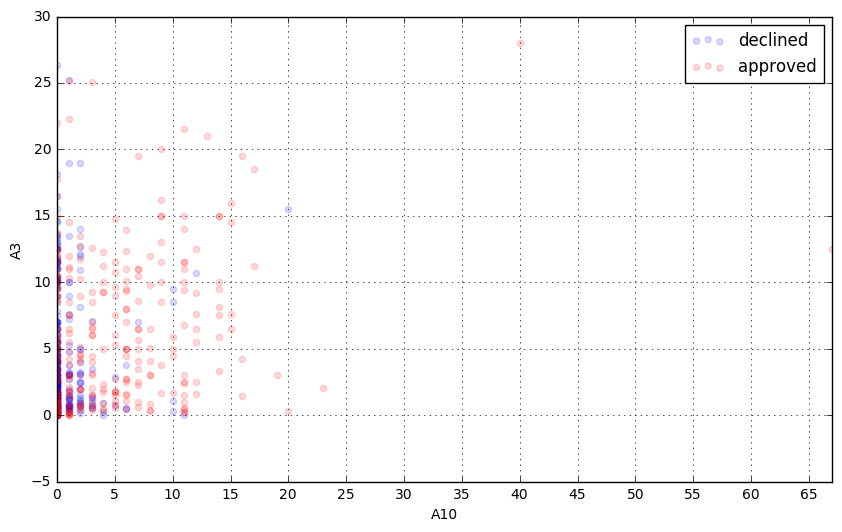

In [13]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['class'] == 0]['A10'],
            data[data['class'] == 0]['A3'],
            alpha = 0.15,
            label = 'declined',
            color = 'b')

plt.scatter(data[data['class'] == 1]['A10'],
            data[data['class'] == 1]['A3'],
            alpha = 0.15,
            label = 'approved',
            color = 'r')

plt.xlabel('A10')
plt.xticks(range(0, 67, 5))
plt.xlim(0, 67)
plt.ylabel('A3')
plt.legend()
plt.grid()

In [14]:
data['A8'].unique()

array([0, 1], dtype=int64)

In [15]:
data['A9'].unique()

array([0, 1], dtype=int64)

## Задача

Удалим поля, которые имеют малую корреляцию с **class** (по модулю менее 0.15)

In [16]:
data = data.drop('A1', axis = 1)\
           .drop('A11', axis = 1)\
           .drop('A12',    axis = 1)\
           .drop('A13', axis = 1)

# Готовим данные

In [17]:
data.columns

Index(['A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A14', 'class'], dtype='object')

In [18]:
#categorical_columns = []
#numerical_columns = []
#for c in data.columns:
#    if data[c].dtype.name == 'object':
#        categorical_columns.append(c)
#    else:
#        numerical_columns.append(c)          

In [19]:
categorical_columns = ['A4', 'A5', 'A6', 'A8', 'A9', 'class']
numerical_columns   = ['A2', 'A3', 'A7', 'A10', 'A14']
print(categorical_columns)
print(numerical_columns)

['A4', 'A5', 'A6', 'A8', 'A9', 'class']
['A2', 'A3', 'A7', 'A10', 'A14']


In [20]:
for c in categorical_columns:
    print(c, data[c].unique())

A4 [2 1 3]
A5 [ 4  8  5  6  3 11  2 14  9 13  7  1 10 12]
A6 [4 3 8 1 5 9 2 7]
A8 [0 1]
A9 [0 1]
class [0 1]


In [21]:
data[numerical_columns].count(axis = 0)

A2     690
A3     690
A7     690
A10    690
A14    690
dtype: int64

In [22]:
data_describe = data.describe()
data[categorical_columns].count(axis = 0)

A4       690
A5       690
A6       690
A8       690
A9       690
class    690
dtype: int64

In [23]:
data['A4'].unique()

array([2, 1, 3], dtype=int64)

In [24]:
data_describe

,A2,A3,A4,A5,A6,A7,A8,A9,A10,A14,class
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,1018.385507,0.444928
std,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,5210.102598,0.497318
min,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,1.000000,0.000000
50%,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,6.000000,0.000000
75%,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,396.500000,1.000000
max,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,100001.000000,1.000000


## Векторизация

Нужно что-то сделать с категориальными (номинальными) признаками

In [25]:
binary_columns    = [c for c in categorical_columns if len(data[c].unique()) == 2]
nonbinary_columns = [c for c in categorical_columns if len(data[c].unique()) > 2]
print(binary_columns, nonbinary_columns)

['A8', 'A9', 'class'] ['A4', 'A5', 'A6']


In [26]:
data = data.astype(object)

К небинарными признакам применим метод _векторизации_, 
который заключается в следующем.

Признак `j`, принимающий `s` значений, заменим на `s` признаков, принимащих значения `0` или `1`,
в зависимости от того, чему равно значение исходного признака `j`.

Например, в нашей задаче признак `race` принимает 5 различных значений: 

In [27]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['A4_1', 'A4_2', 'A4_3', 'A5_1', 'A5_2', 'A5_3', 'A5_4', 'A5_5', 'A5_6',
       'A5_7', 'A5_8', 'A5_9', 'A5_10', 'A5_11', 'A5_12', 'A5_13', 'A5_14',
       'A6_1', 'A6_2', 'A6_3', 'A6_4', 'A6_5', 'A6_7', 'A6_8', 'A6_9'],
      dtype='object')


In [28]:
data_nonbinary = data_nonbinary.astype('int64')


## Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных.
К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно _нормализовать_.
Это можно делать разными способами.
Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [29]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,A2,A3,A7,A10,A14
count,690.00,690.0,690.0,690,690
unique,350.00,215.0,132.0,23,240
top,31.57,1.5,0.0,0,1
freq,12.00,21.0,70.0,395,295


In [30]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [31]:
data_numerical=data_numerical.astype('float64')

In [32]:
data_numerical.describe()

,A2,A3,A7,A10,A14
count,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02
mean,7.024333e-15,3.472263e-16,5.127943e-16,1.444899e-16,5.084500e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.503231e+00,-9.559198e-01,-6.643947e-01,-4.935286e-01,-1.952717e-01
25%,-7.506959e-01,-7.550425e-01,-6.150897e-01,-4.935286e-01,-1.952717e-01
50%,-2.483030e-01,-4.035072e-01,-3.655762e-01,-4.935286e-01,-1.943120e-01
75%,5.179411e-01,4.919034e-01,1.200038e-01,1.233822e-01,-1.193615e-01
max,4.107034e+00,4.668645e+00,7.851932e+00,1.328414e+01,1.899821e+01


## Соединяем все в одну таблицу

In [33]:
data[binary_columns] = data[binary_columns].astype('int64')

In [34]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)
#print data.columns

(690, 33)


In [35]:
data.describe()

,A2,A3,A7,A10,A14,A4_1,A4_2,A4_3,A5_1,A5_2,...,A6_2,A6_3,A6_4,A6_5,A6_7,A6_8,A6_9,A8,A9,class
count,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,...,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,7.024333e-15,3.472263e-16,5.127943e-16,1.444899e-16,5.084500e-17,0.236232,0.760870,0.002899,0.076812,0.043478,...,0.008696,0.011594,0.591304,0.085507,0.008696,0.20000,0.011594,0.523188,0.427536,0.444928
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.425074,0.426862,0.053799,0.266485,0.204079,...,0.092912,0.107128,0.491949,0.279838,0.092912,0.40029,0.107128,0.499824,0.495080,0.497318
min,-1.503231e+00,-9.559198e-01,-6.643947e-01,-4.935286e-01,-1.952717e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,-7.506959e-01,-7.550425e-01,-6.150897e-01,-4.935286e-01,-1.952717e-01,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,-2.483030e-01,-4.035072e-01,-3.655762e-01,-4.935286e-01,-1.943120e-01,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000
75%,5.179411e-01,4.919034e-01,1.200038e-01,1.233822e-01,-1.193615e-01,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000,1.000000
max,4.107034e+00,4.668645e+00,7.851932e+00,1.328414e+01,1.899821e+01,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


# X и y

In [36]:
X = data.drop(('class'), axis = 1) # выбрасываем столбец 'class'
y = data['class']
feature_names = X.columns


In [37]:
type(feature_names)

pandas.indexes.base.Index

In [38]:
feature_names

Index(['A2', 'A3', 'A7', 'A10', 'A14', 'A4_1', 'A4_2', 'A4_3', 'A5_1', 'A5_2',
       'A5_3', 'A5_4', 'A5_5', 'A5_6', 'A5_7', 'A5_8', 'A5_9', 'A5_10',
       'A5_11', 'A5_12', 'A5_13', 'A5_14', 'A6_1', 'A6_2', 'A6_3', 'A6_4',
       'A6_5', 'A6_7', 'A6_8', 'A6_9', 'A8', 'A9'],
      dtype='object')

In [39]:
print(X.shape)
print(y.shape)
N, d = X.shape

(690, 32)
(690,)


In [40]:
type(X)

pandas.core.frame.DataFrame

In [41]:
X.dtypes

A2       float64
A3       float64
A7       float64
A10      float64
A14      float64
A4_1       int64
A4_2       int64
A4_3       int64
A5_1       int64
A5_2       int64
A5_3       int64
A5_4       int64
A5_5       int64
A5_6       int64
A5_7       int64
A5_8       int64
A5_9       int64
A5_10      int64
A5_11      int64
A5_12      int64
A5_13      int64
A5_14      int64
A6_1       int64
A6_2       int64
A6_3       int64
A6_4       int64
A6_5       int64
A6_7       int64
A6_8       int64
A6_9       int64
A8         int64
A9         int64
dtype: object

In [42]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

483 207


# $k$NN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [44]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [45]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.15734989648 0.173913043478


In [46]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [47]:
err_test

0.17391304347826086

In [48]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[103  12]
 [ 24  68]]


### Подбор параметров

In [52]:
# Долго!
from sklearn.grid_search import GridSearchCV
nnb = list(range(1, 60))
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.163561076605 17


In [53]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.153209109731 0.135265700483


# SVC

In [77]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.164531414531 0.157641519091


### Подбор параметров

In [79]:
from sklearn.grid_search import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)


KeyboardInterrupt



In [ ]:
svc = SVC(C = best_C).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

# Random Forest

In [80]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

4.3875043875e-05 0.167673252124


### Значимость признаков

In [81]:
a=[1,2,5,70,32,3,4,7,234, 3]
a[-1:3:-1]

[3, 234, 7, 4, 3, 32]

In [82]:
np.sum(rf.feature_importances_)

0.99999999999999967

In [83]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

Feature ranking:
 1. feature 'fnlwgt' (0.206736)
 2. feature '  age' (0.183969)
 3. feature 'education-num' (0.135674)
 4. feature 'hours-per-week' (0.100523)
 5. feature 'marital-status_Married-civ-spouse' (0.071025)
 6. feature 'relationship_Husband' (0.047541)
 7. feature 'marital-status_Never-married' (0.024367)
 8. feature 'occupation_Exec-managerial' (0.021841)
 9. feature '  sex' (0.013883)
10. feature 'occupation_Prof-specialty' (0.012760)
11. feature 'workclass_Private' (0.011500)
12. feature 'relationship_Not-in-family' (0.011351)
13. feature 'relationship_Wife' (0.010969)
14. feature 'occupation_Other-service' (0.009693)
15. feature 'workclass_Self-emp-not-inc' (0.009357)
16. feature 'relationship_Own-child' (0.009145)
17. feature 'workclass_Self-emp-inc' (0.007903)
18. feature 'race_White' (0.007806)
19. feature 'occupation_Sales' (0.007469)
20. feature 'marital-status_Divorced' (0.007117)
21. feature 'occupation_Craft-repair' (0.007087)
22. feature 'workclass_Local-gov' (0

In [84]:
feature_names[[1,0,1]]

Index(['fnlwgt', 'age', 'fnlwgt'], dtype='object')

(-1, 20)

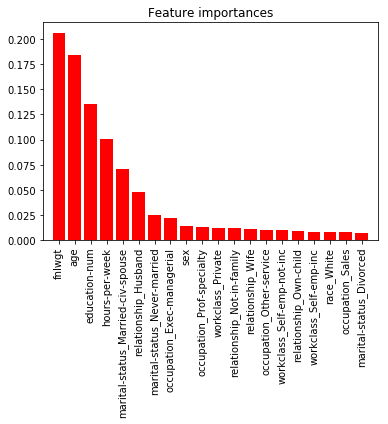

In [85]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

Использование только признаков
`age`, `hourse-per-week`, `education-num`, `marital-status`, `relationship`, `occupation`
существенно улучшает точность (понижает ошибку до 16-19%) на алгоритмах kNN и SVC.
На самом деле, решающую роль играет удаление признака `fnlwgt`

# Extremely Randomized Trees

In [86]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

4.3875043875e-05 0.182311393183


# AdaBoost

In [87]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.159178659179 0.157948612959


# GBT

In [88]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.125351000351 0.156106049749
